# OVERVIEW

Ndege Holding.Inc is expanding to new horizons in order to diversify the portfolio to new markets, aviation sector has selected as the new frontier. The board has acquired crucial data from NTSB that would help make an informed decision in purchasing and operating airplanes for commercial and private enterprises. 

The board lacks prior experience in aviation and therefore faces uncertainty around aircraft safety and operational risk. Poor aircraft selection could lead to increased accidents, financial losses, reputational damage, and higher insurance costs. This analysis aims to reduce those risks by identifying historically safer aircraft options.

## BUSINESS UNDERSTANDING


Kamaa.Inc has been appointed to analyse the data to assist the board in making smart investments in aircrafts that are safer, more reliable, and cost-effective over time. Because the Kamaa Holding.Inc has no prior experience in aviation, leadership needs data-driven guidance to avoid costly mistakes such as:Buying aircraft models with high accident rates, investing in aircraft that require frequent repairs or have high fatality risks and choosing aircraft that may increase insurance costs and operational downtime.

Aircraft purchase and maintenance require huge financial costs, compounded by accidents, loss of life the repair, lawsuits and insurance are expensive and can damage the airline brand. By analyzing historical aviation accident data (2018–2023), we can identify patterns of risk and recommend aircraft types that historically demonstrate lower accident frequency and severity. This allows the company to make safer investment decisions backed by real data instead of assumptions.

## OBJECTIVES

    1. Clean and prepare data (flight) to give accurate analysis
    2. Quantify aircraft risk by defining measurable indicators (frequency and severity).
    3. Compare and Identify low risk aircraft based on maintenance and safety performance
    4. Visualize trends and insights for high level decision makers.
    5. Translate analytical findings into actionable recommendations for aircraft acquisition decisions.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Load the data set
df = pd.read_csv('flight.csv')
df

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...,...
2495,1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,1248,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


## DATA UNDERSTANDING

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


In [4]:
#Noticed I deleted 'fat' column want to bring it back.
df = pd.read_csv("flight.csv")

#Missing fatality values were treated as zero under the assumption that unrecorded fatalities indicate no loss of life.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


In [20]:
#creating a new column 'year', dropping missing data and changing from data type 'object' 
#for easier analysis. 
df['year'] = (
    pd.to_datetime(df['acc.date'], errors='coerce')
      .dt.year
)

df = df.dropna(subset=['year'])
df.loc[:, 'year'] = df['year'].astype(int)

/Users/jane/miniconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Created a new column 'year' to analyse the trends annualy. This makes it easier to sum p yearly counts as opposed to dates. 

In [21]:
df.head()

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg,year
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub,2022
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub,2022
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub,2022
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o,2022
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o,2022


In [8]:
df.tail()

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg,year
2494,1244,20 Dec 2018,Antonov An-26B,9S-AGB,Gomair,7,ca 37 km from Kinshasa-N'Djili Airport (FIH),w/o,2018
2495,1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o,2018
2496,1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub,2018
2497,1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o,2018
2498,1248,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub,2018


## DATA CLEANING

Data cleaning methods explored various steps, for example:

        1.Checking for missing values
        2.Checking for duplicated values
        3.Converting objects to intergers
        4.Creating data uniformity

In [22]:
#Missing values 
df.isna().sum().sort_values(ascending=False)

reg           90
operator      14
fat           12
year           0
dmg            0
location       0
type           0
acc.date       0
Unnamed: 0     0
dtype: int64

In [10]:
#Checking the data after dropping the missing values. 
df.info()
# columns are 8 and rows have dropped to 2494

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2494 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2494 non-null   int64 
 1   acc.date    2494 non-null   object
 2   type        2494 non-null   object
 3   reg         2404 non-null   object
 4   operator    2480 non-null   object
 5   fat         2482 non-null   object
 6   location    2494 non-null   object
 7   dmg         2494 non-null   object
 8   year        2494 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 194.8+ KB


In [23]:
#Selecting key columns to work with 
#key data columns to work with
key_data_columns = ['year', 'type','fat', 'dmg']
df = df[key_data_columns]
df

,year,type,fat,dmg
0,2022,British Aerospace 4121 Jetstream 41,0,sub
1,2022,British Aerospace 3101 Jetstream 31,0,sub
2,2022,Boeing 737-4H6,0,sub
3,2022,Tupolev Tu-204-100C,0,w/o
4,2022,Beechcraft 200 Super King Air,0,w/o
...,...,...,...,...
2494,2018,Antonov An-26B,7,w/o
2495,2018,Cessna 560 Citation V,4,w/o
2496,2018,PZL-Mielec M28 Skytruck,0,sub
2497,2018,Antonov An-26B,0,w/o


## DATA ANALYSIS

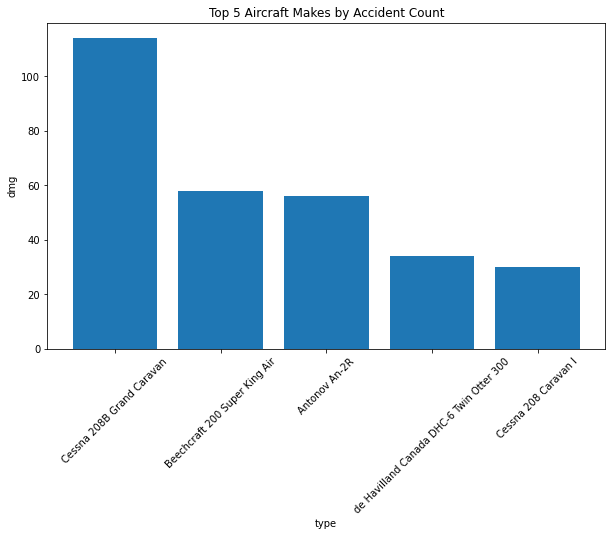

In [27]:
#Top 5 aircraft type accidents counts
top_makes_acc = df['type'].value_counts().head(5)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_makes_acc.index, top_makes_acc.values)
ax.set_title("Top 5 Aircraft Makes by Accident Count")
ax.set_xlabel("type")
ax.set_ylabel("dmg")
plt.xticks(rotation=45)
plt.show()

The bar chart shows that certain aircraft types consistently account for higher fatality counts, indicating elevated safety risk compared to others.Cessna 208B had the highest accidents, followed by Beechcraft 200 and Cessna 208 the last among the top 5 aircrafts. 

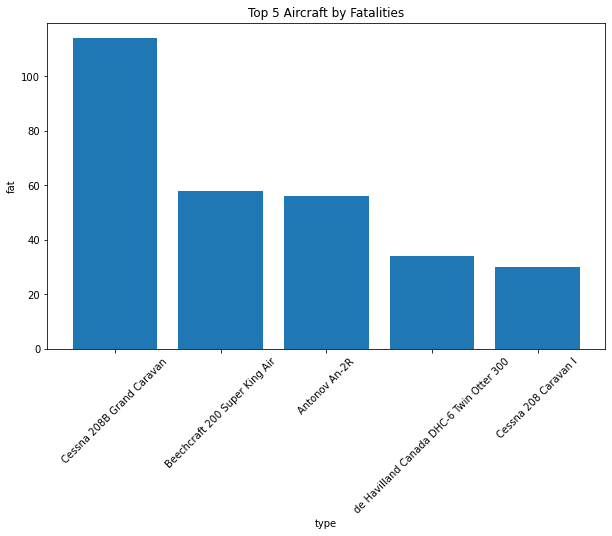

In [28]:
top_makes_fat = df['type'].value_counts().head(5)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_makes_fat.index, top_makes_fat.values)
ax.set_title("Top 5 Aircraft by Fatalities")
ax.set_xlabel("type")
ax.set_ylabel("fat")
plt.xticks(rotation=45)
plt.show()

From the graph above, Cessna 208B had the highest fatalities and Cessna 208 the least among the top 5 aircrafts. 

In [30]:
#Fatalities per year 
#The fatality column has str (97+1) and int, I want to convert all to int. 
#This involved data cleaning to create data uniformity

def eval_sum(x):
    
    #Converts strings leaves integers as-is.
   
    if isinstance(x, str) and '+' in x:
        try:
            return sum(int(i) for i in x.split('+'))
        except:
            return 0  # fallback for malformed strings
    try:
        return int(x)
    except:
        return 0  # fallback for anything else

# Apply to the 'fat' column
df['fat'] = df['fat'].apply(eval_sum)

In [31]:
#Checking the above equation if works. 
#This specific data set had '97+1'
df.iloc[540]

year               2020
type    Airbus A320-214
fat                  98
dmg                 w/o
Name: 542, dtype: object

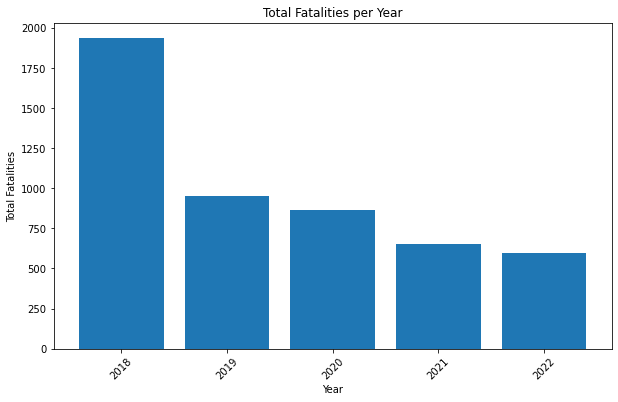

In [32]:
#Fatalities per year 
fatalities_per_year = (
    df.groupby('year')['fat']
    .sum()
    .reset_index())

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(fatalities_per_year['year'],
    fatalities_per_year['fat'])

ax.set_title("Total Fatalities per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total Fatalities")

plt.xticks(rotation=45)
plt.show()

The above gragh shows decreasing accidents fatalities over the years from 2018 to 2022. 

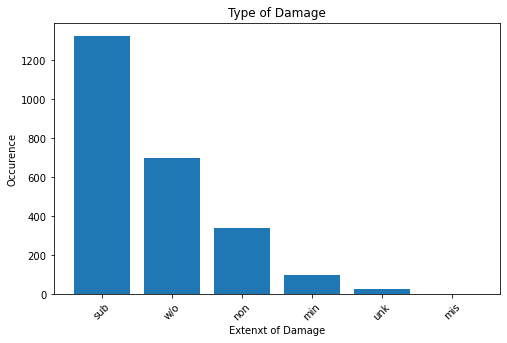

In [34]:
#Severity of Aircraft damages  

damage_counts = df['dmg'].value_counts()

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(damage_counts.index, damage_counts.values)
ax.set_title("Type of Damage")
ax.set_xlabel("Extenxt of Damage")
ax.set_ylabel("Occurence")
plt.xticks(rotation=45)
plt.show()

The gragh above shows of the aircraft recorded substantial damage, while others were written off meaning total loss. 

In [ ]:
df.to_csv("flight_clean.csv", index=False)

In [49]:
#Summary of Total_Flight data for top 5 aircraft for tableau analysis
Total_Flight_Summary = (
    df
    .groupby('type', as_index=False)
    .agg(
        dmg=('type', 'count'),
        fat=('fat', 'sum'),
    )
    .sort_values('dmg', ascending=False)
)
Total_Flight_Summary = Total_Flight_Summary.head(5)
Total_Flight_Summary

,type,dmg,fat
289,Cessna 208B Grand Caravan,114,86
88,Beechcraft 200 Super King Air,58,16
69,Antonov An-2R,56,46
506,de Havilland Canada DHC-6 Twin Otter 300,34,86
287,Cessna 208 Caravan I,30,8


In [42]:
Total_Flight_Summary.to_csv("Total_Flight_Summary.csv", index=False)

## KEY INSIGHTS

1. Fatalities patterns vary significantly by aircraft type with small aircrafts contributing significantly to large porportion of total fatalities. 

2. Fatality trends show a decline suggesting aviation safety improvement, however outliers exist indicating persisent risk. 

3. Aircraft type though a good indicator doesn't necesarily a strong indicator, this could also imply that small aircraft have been purchased in high numbers hence correlating to high number of accidents and vice-versa also applies. 

4. Aircraft operators practices and maintenance play crucial role in damages and fatalities and not necessarily linked to aircraft type. 

## CONCLUSION AND RECOMMENDATIONS

This analytical summary of avitaion accident data seeks to inform aircraft safety risk and inform data droven decision making. The data was cleaned, and ket data sets selected were the year of the accident, type of aircraft, number of fatalities and the extent of the aircraft damage. The data shows aviation safety and risk is not direct linked to aircraft types or year. Safety has improved overtime, and small aircraft consistently show disproportionate share of fatalities, higher opertional and safety risk. 

1. Prioritize aircrafts with low-risk fatalities and fewer accidents. This offers a safer entry point into aviation operations, aircrafts with elevated fatalities pose safety, financial and reputations risk. 
2. Continous aviation safety monitoring should be buttressed in the new aviation division.Risk assessment should continue beyond acquistion, as operations and maintenance do contribute to fatalities and damage. 
3. More analysis is required on the reason for declining fatalities and accidents over the years, has safety aviation increased? 


Annexes

Tableau Link
https://public.tableau.com/authoring/Total_flight_data/TotalAccidentsperAircraft/Total_flights_data_Dashboard#1 